In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

check dmt_en and dmt_hi reach

In [30]:
wa=pd.read_csv('Fino Dataset- Aayush - whatsapp (1).csv')

In [31]:
wa.head()

,Product,Date,Campaign Name,Target Audience,Message,Creative,Total Request,Sent,Delivered,Read,Failed
0,FinoPay,16th Nov,Vkyc,Vkyc Pending Customers,NaN,NaN,16568.0,16568.0,11239.0,8674.0,2599.0
1,FinoPay,22nd Nov,Vkyc,Vkyc Pending Customers,NaN,NaN,28065.0,28065.0,21057.0,14866.0,3080.0
2,Bhavishya Account,23rd Nov,Bhavishya*Braingym,Newly Onboarded Customers,NaN,NaN,36334.0,36334.0,22668.0,18809.0,9562.0
3,Bhavishya Account,23rd Nov,Bhavishya*Braingym,Renewal Pending Customers,NaN,NaN,24970.0,24970.0,14214.0,11001.0,8175.0
4,FinoPay,20th Nov,ReKyc through Vkyc,ReKyc Pending Customers,NaN,NaN,82931.0,82926.0,26158.0,18732.0,50138.0


In [32]:
wa = wa.drop(['Creative'],axis=1)

In [33]:
wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          128 non-null    object 
 1   Date             128 non-null    object 
 2   Campaign Name    128 non-null    object 
 3   Target Audience  128 non-null    object 
 4   Message          115 non-null    object 
 5   Total Request    126 non-null    float64
 6   Sent             126 non-null    float64
 7   Delivered        126 non-null    float64
 8   Read             126 non-null    float64
 9   Failed           126 non-null    float64
dtypes: float64(5), object(5)
memory usage: 10.1+ KB


In [34]:
wa.describe()

,Total Request,Sent,Delivered,Read,Failed
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,24939.460317,24939.365079,15587.587302,11356.095238,7004.920635
std,44602.665986,44602.393746,30232.296113,22644.127036,13921.741501
min,76.000000,76.000000,0.000000,0.000000,5.000000
25%,87.000000,87.000000,61.000000,48.000000,23.000000
50%,275.000000,275.000000,185.000000,142.000000,74.000000
75%,37097.500000,37097.500000,23688.000000,14841.250000,8220.750000
max,200354.000000,200347.000000,168638.000000,136585.000000,55489.000000


In [35]:
!pip install langid
import langid
def classify_language(message):
    if isinstance(message, str): 
        lang, _ = langid.classify(message)
        if lang == 'hi':
            return 'Hindi'  # Hindi written in Devanagari
        elif lang == 'en':
            return 'English'  # English written in English
        else:
            return 1  # Hindi written in English
    else:
        return np.nan  # Handle NaN values

wa['Language_Category'] = wa['Message'].apply(classify_language)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [36]:
wa['Language_Category']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
123      Hindi
124    English
125    English
126    English
127    English
Name: Language_Category, Length: 128, dtype: object

In [37]:
wa['Target Audience'].nunique()

30

In [38]:
wa['Target Audience'].value_counts()

Target Audience
Merchant Base                                                    78
Balance Buildup Base                                              5
Rekyc Pending Base                                                4
Customers who didnt fund their finopay savings account            4
CASA Dump                                                         3
CDP Base (Ones who do not have CASA)                              2
Bhavishya A/C Renewal Base                                        2
VKYC initiated but not completed customer base                    2
FinoPay Inactive Customers                                        2
Renewal Base                                                      2
Newly Onboarded Base                                              2
Vkyc Pending Base                                                 2
CDP Base                                                          2
Vkyc Pending Customers                                            2
Active FinoPay User Base        

In [39]:
wa['Target Audience'] = wa['Target Audience'].apply(lambda x: 'Merchant Base' if 'Merchant' in x else 'Non-Merchant Base')


In [40]:
print(wa['Target Audience'].nunique())
print(wa['Target Audience'])

2
0      Non-Merchant Base
1      Non-Merchant Base
2      Non-Merchant Base
3      Non-Merchant Base
4      Non-Merchant Base
             ...        
123    Non-Merchant Base
124    Non-Merchant Base
125        Merchant Base
126        Merchant Base
127        Merchant Base
Name: Target Audience, Length: 128, dtype: object


In [41]:
wa['Category'] = wa['Campaign Name'].apply(lambda x: 'dmt' if 'dmt' in x.lower() else x)


In [42]:
wa['Category'].nunique()

38

In [43]:
wa['Category'] = wa['Campaign Name'].apply(lambda x: 'dmt' if 'dmt' in x.lower() else x)


In [44]:
wa["Rate"]=(wa["Read"]/wa['Sent']*100)

In [45]:
wa['Rate'].describe()

count    126.000000
mean      48.854200
std       14.699980
min        0.000000
25%       43.522795
50%       52.848582
75%       59.090909
max       68.619247
Name: Rate, dtype: float64

In [46]:
wa.sort_values(by='Rate',ascending=False)

,Product,Date,Campaign Name,Target Audience,Message,Total Request,Sent,Delivered,Read,Failed,Language_Category,Category,Rate
11,CAM,9th Nov,CAM Gujarati,Merchant Base,NaN,239.0,239.0,199.0,164.0,31.0,NaN,CAM Gujarati,68.619247
7,Kisan Samman Nidhi Yojana,14th Nov,Kisan Samman Nidhi Yojana,Merchant Base,NaN,200354.0,200347.0,168638.0,136585.0,23468.0,NaN,Kisan Samman Nidhi Yojana,68.174218
82,DMT,08-01-2024 12:30,dmt_3,Merchant Base,*Extra Commission On Dmt Business!* To achieve...,80.0,80.0,62.0,54.0,17.0,English,dmt,67.500000
78,DMT,06-01-2024 10:26,dmt_3_followup,Merchant Base,*डीएमटी व्यवसाय पर अतिरिक्त कमीशन!*\r\n\r\nडीए...,80.0,80.0,62.0,54.0,17.0,Hindi,dmt,67.500000
8,FinoPay,10th Nov,Digital Gold,Non-Merchant Base,NaN,77053.0,77053.0,61696.0,50209.0,8236.0,NaN,Digital Gold,65.161642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,DMT,05-01-2024 11:33,dmt_3,Merchant Base,*Extra Commission On Dmt Business!* To achieve...,79.0,79.0,47.0,5.0,5.0,English,dmt,6.329114
109,DMT,18-01-2024 15:38,dmt_1hindi_followup,Merchant Base,*डीएमटी व्यवसाय पर अतिरिक्त कमीशन!*\r\n\r\nडीए...,275.0,275.0,0.0,0.0,275.0,Hindi,dmt,0.000000
118,Bhavishya*Braingym,23-01-2024 16:35,bhavishya_newly_onboarded,Non-Merchant Base,पाएं तेज़ दिमाग के साथ सुरक्षित भविष्य!\nफिनो क...,35994.0,35994.0,0.0,0.0,35994.0,Hindi,bhavishya_newly_onboarded,0.000000
5,DMT,1st Nov - 28th Nov,DMT Slabs,Non-Merchant Base,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dmt,NaN


In [49]:
print(wa[['Product','Category','Language_Category']].nunique())

Product              21
Category             38
Language_Category     2
dtype: int64


In [50]:
wa.drop(['Category'],axis=1)

,Product,Date,Campaign Name,Target Audience,Message,Total Request,Sent,Delivered,Read,Failed,Language_Category,Rate
0,FinoPay,16th Nov,Vkyc,Non-Merchant Base,NaN,16568.0,16568.0,11239.0,8674.0,2599.0,NaN,52.353935
1,FinoPay,22nd Nov,Vkyc,Non-Merchant Base,NaN,28065.0,28065.0,21057.0,14866.0,3080.0,NaN,52.969891
2,Bhavishya Account,23rd Nov,Bhavishya*Braingym,Non-Merchant Base,NaN,36334.0,36334.0,22668.0,18809.0,9562.0,NaN,51.766940
3,Bhavishya Account,23rd Nov,Bhavishya*Braingym,Non-Merchant Base,NaN,24970.0,24970.0,14214.0,11001.0,8175.0,NaN,44.056868
4,FinoPay,20th Nov,ReKyc through Vkyc,Non-Merchant Base,NaN,82931.0,82926.0,26158.0,18732.0,50138.0,NaN,22.588814
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Day 2 (SA ROI 7.5%),24-01-2024 11:51,day_2_followup,Non-Merchant Base,फिनो के साथ अपनी बचत बढ़ाएँ!\r\nअब अपने बचत खा...,189117.0,189117.0,114201.0,71729.0,55469.0,Hindi,37.928372
124,FinoPay OTT,25-01-2024 15:13,ott_finopay_unconverted_leads_eng,Non-Merchant Base,Watch your favorite web series through OTT pla...,13269.0,13269.0,8677.0,3970.0,1526.0,English,29.919361
125,DMT,25-01-2024 16:32,dmt_1english,Merchant Base,*Extra Commission On Dmt Business!* To achieve...,275.0,275.0,179.0,50.0,73.0,English,18.181818
126,DMT,25-01-2024 16:36,dmt_2_english,Merchant Base,*Extra Commission On Dmt Business!* To achieve...,77.0,77.0,47.0,14.0,25.0,English,18.181818


In [51]:
wa["Failure Rate"]=(wa['Failed']/wa['Total Request']*100)

In [53]:
wa.sort_values(by='Failure Rate',ascending=False).head(10)

,Product,Date,Campaign Name,Target Audience,Message,Total Request,Sent,Delivered,Read,Failed,Language_Category,Category,Rate,Failure Rate
118,Bhavishya*Braingym,23-01-2024 16:35,bhavishya_newly_onboarded,Non-Merchant Base,पाएं तेज़ दिमाग के साथ सुरक्षित भविष्य!\nफिनो क...,35994.0,35994.0,0.0,0.0,35994.0,Hindi,bhavishya_newly_onboarded,0.000000,100.000000
109,DMT,18-01-2024 15:38,dmt_1hindi_followup,Merchant Base,*डीएमटी व्यवसाय पर अतिरिक्त कमीशन!*\r\n\r\nडीए...,275.0,275.0,0.0,0.0,275.0,Hindi,dmt,0.000000,100.000000
4,FinoPay,20th Nov,ReKyc through Vkyc,Non-Merchant Base,NaN,82931.0,82926.0,26158.0,18732.0,50138.0,NaN,ReKyc through Vkyc,22.588814,60.457489
24,Rekyc through Vkyc,11-12-2023 15:01,rekyc_braingym_eng,Non-Merchant Base,"Dear Customer,\r\nRe-activate your Account wit...",82946.0,82946.0,26273.0,19900.0,50049.0,English,rekyc_braingym_eng,23.991513,60.339257
45,Rekyc through Vkyc,19-12-2023 14:06,rekyc_braingym_eng,Non-Merchant Base,"""Dear Customer,\r\nRe-activate your Account wi...",82935.0,82935.0,26288.0,17339.0,50008.0,English,rekyc_braingym_eng,20.906734,60.297824
35,Rekyc through Vkyc,15-12-2023 16:55,rekyc_braingym_eng,Non-Merchant Base,"""Dear Customer,\r\nRe-activate your Account wi...",82946.0,82946.0,26274.0,18875.0,49870.0,English,rekyc_braingym_eng,22.755769,60.123454
54,Rekyc through Vkyc,23-12-2023 12:44,rekyc_braingym_eng,Non-Merchant Base,"""Dear Customer,\r\nRe-activate your Account wi...",82936.0,82936.0,26353.0,14767.0,49801.0,English,rekyc_braingym_eng,17.805296,60.047507
3,Bhavishya Account,23rd Nov,Bhavishya*Braingym,Non-Merchant Base,NaN,24970.0,24970.0,14214.0,11001.0,8175.0,NaN,Bhavishya*Braingym,44.056868,32.739287
106,DMT,17-01-2024 18:40,dmt_2english,Merchant Base,*Extra Commission On Dmt Business!* To achieve...,77.0,77.0,51.0,46.0,25.0,English,dmt,59.740260,32.467532
81,DMT,08-01-2024 12:27,dmt_2,Merchant Base,*Extra Commission On Dmt Business!* To achieve...,77.0,77.0,50.0,47.0,25.0,English,dmt,61.038961,32.467532


In [61]:
print(wa.groupby('Target Audience')['Failure Rate'].mean())
print(wa.groupby('Target Audience')['Rate'].mean())


Target Audience
Merchant Base        26.094955
Non-Merchant Base    27.585145
Name: Failure Rate, dtype: float64
Target Audience
Merchant Base        51.538991
Non-Merchant Base    44.021576
Name: Rate, dtype: float64


In [56]:
wa.groupby('Language_Category')['Rate'].mean()

Language_Category
English    48.943859
Hindi      47.224480
Name: Rate, dtype: float64

In [57]:
wa['Date'] = pd.to_datetime(wa['Date'], errors='coerce')

# Extract hour and create a new 'Time' column
wa['Time'] = wa['Date'].dt.hour

# If the 'Date' column doesn't follow the specified format, set 'Time' to NaN
wa.loc[wa['Date'].isna(), 'Time'] = np.nan


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2273/3367398861.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wa['Date'] = pd.to_datetime(wa['Date'], errors='coerce')


In [58]:
wa[['Date','Time']]

,Date,Time
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
...,...,...
123,2024-01-24 11:51:00,11.0
124,2024-01-25 15:13:00,15.0
125,2024-01-25 16:32:00,16.0
126,2024-01-25 16:36:00,16.0


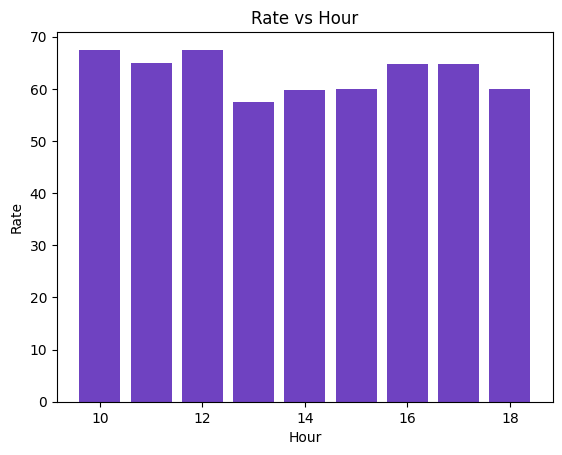

In [60]:
wa_plot_data = wa.dropna(subset=['Time', 'Rate'])
company_colors = ['#6610f2', '#6f42c1', '#e83e8c'] 
plt.bar(wa_plot_data['Time'], wa_plot_data['Rate'],color=company_colors[1])
plt.xlabel('Hour')
plt.ylabel('Rate')
plt.title('Rate vs Hour')
plt.show()

Different use-case than RCS/ Notif- Usually time doesnot matter when sending whatsapp message. People take it as "Task" to read all the wa messages rather, reading notifications and messages depends upon the quality of the message.


In [64]:
wa[wa['Target Audience']=='Non-Merchant Base'].sort_values(by='Rate',ascending=False).head(10)

,Product,Date,Campaign Name,Target Audience,Message,Total Request,Sent,Delivered,Read,Failed,Language_Category,Category,Rate,Failure Rate,Time
8,FinoPay,NaT,Digital Gold,Non-Merchant Base,NaN,77053.0,77053.0,61696.0,50209.0,8236.0,NaN,Digital Gold,65.161642,10.688747,NaN
19,FinoPay OTT,2023-08-12 16:15:00,finopay_ott_play_codes,Non-Merchant Base,"Hi {{1}},\r\n\r\nCongratulations on opening an...",5394.0,5394.0,3911.0,3448.0,712.0,English,finopay_ott_play_codes,63.922877,13.199852,16.0
91,Digital Savings Account Expiration,2024-12-01 11:23:00,finopay_renewals_eng,Non-Merchant Base,*Now get cashback on renewal!!*\r\n \r\nYour a...,1582.0,1582.0,1366.0,1010.0,94.0,English,finopay_renewals_eng,63.843236,5.941846,11.0
103,FinoPay Funding,2024-01-16 17:27:00,finopay_funding_eng,Non-Merchant Base,Now Fund your FinoPay Savings Account to watch...,128114.0,128114.0,105822.0,78345.0,11203.0,English,finopay_funding_eng,61.152567,8.744556,17.0
108,FinoPay OTT,2024-01-18 14:03:00,ott_codes_fancode,Non-Merchant Base,"Hi {{1}},\r\n\r\nCongratulations on opening an...",5105.0,5105.0,3437.0,3048.0,756.0,English,ott_codes_fancode,59.706170,14.809011,14.0
79,FinoPay OTT,2024-06-01 10:51:00,finopay_ott_play_codes,Non-Merchant Base,"Hi {{1}},\r\n\r\nCongratulations on opening an...",3984.0,3984.0,2715.0,2372.0,577.0,English,finopay_ott_play_codes,59.538153,14.482932,10.0
59,FinoPay OTT,2023-12-27 17:12:00,finopay_ott_funding,Non-Merchant Base,*Now Fund your FinoPay Savings Account to watc...,142266.0,142266.0,113232.0,83920.0,13042.0,English,finopay_ott_funding,58.988093,9.167334,17.0
9,FinoPay,NaT,Merchant Refer & Earn,Non-Merchant Base,NaN,52782.0,52782.0,42225.0,30723.0,7783.0,NaN,Merchant Refer & Earn,58.207343,14.745557,NaN
104,FinoPay Funding,2024-01-17 15:57:00,ottplay_funding_hindi,Non-Merchant Base,*अब अपनी पसंदीदा वेब सीरीज़ देखने के लिए अपने फ...,128121.0,128121.0,105273.0,70487.0,11117.0,Hindi,ottplay_funding_hindi,55.015961,8.676954,15.0
89,VKYC,2024-11-01 17:37:00,finopay_min_kyc_eng,Non-Merchant Base,Free movie tickets worth Rs. {{1}}. Just click...,4447.0,4447.0,3361.0,2434.0,522.0,English,finopay_min_kyc_eng,54.733528,11.738251,17.0


Non Merchant Base usually reads messages written in English rather than Hindi

In [69]:
print(wa[wa['Target Audience'] == 'Non-Merchant Base']['Rate'].mean())
print(wa[(wa['Target Audience'] == 'Non-Merchant Base') & (wa['Language_Category'] == 'English')]['Rate'].mean())
print(wa[(wa['Target Audience'] == 'Non-Merchant Base') & (wa['Language_Category'] == 'Hindi')]['Rate'].mean())


44.02157598804499
45.742902749128135
38.69082337840434


In [72]:
print(wa[(wa['Target Audience'] == 'Non-Merchant Base') & (wa['Language_Category'] == 'Hindi')].nunique())
print(wa[(wa['Target Audience'] == 'Non-Merchant Base') & (wa['Language_Category'] == 'English')].nunique())


Product               8
Date                 16
Campaign Name        11
Target Audience       1
Message              10
Total Request        15
Sent                 15
Delivered            16
Read                 16
Failed               16
Language_Category     1
Category             11
Rate                 16
Failure Rate         16
Time                  6
dtype: int64
Product               7
Date                 21
Campaign Name        13
Target Audience       1
Message              13
Total Request        18
Sent                 18
Delivered            21
Read                 21
Failed               21
Language_Category     1
Category             13
Rate                 21
Failure Rate         21
Time                  8
dtype: int64


In [73]:
print(wa[(wa['Product'] == 'DMT')] ['Rate'].mean())


50.74190980805386


In [75]:
print(wa[(wa['Product'] == 'DMT')] ['Rate'].describe())


count    73.000000
mean     50.741910
std      14.549158
min       0.000000
25%      47.169811
50%      55.172414
75%      59.740260
max      67.500000
Name: Rate, dtype: float64


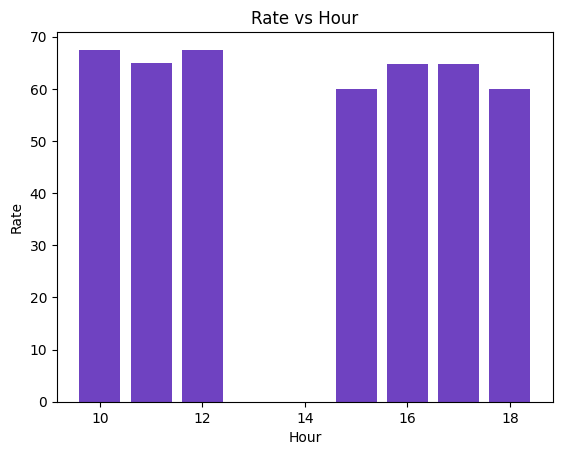

In [79]:
# Filter 'wa_plot_data' to include only the common set of hours
common_hours = wa_plot_data['Time'].unique()
filtered_data = wa_plot_data[wa_plot_data['Time'].isin(common_hours) & (wa_plot_data['Product'] == 'DMT')]
plt.bar(filtered_data['Time'], filtered_data['Rate'], color=company_colors[1])
plt.xlabel('Hour')
plt.ylabel('Rate')
plt.title('Rate vs Hour')
plt.show()


No Messages sent for Product= DMT between 13-14

In [78]:
# Check the length of 'Time' and 'Rate' arrays
print(len(wa_plot_data['Time']))
print(len(wa_plot_data[wa_plot_data['Product']=='DMT']['Rate']))

# Check for NaN values in 'Time' and 'Rate'
print(wa_plot_data['Time'].isnull().sum())
print(wa_plot_data[wa_plot_data['Product']=='DMT']['Rate'].isnull().sum())

# Print the data types of 'Time' and 'Rate'
print(wa_plot_data['Time'].dtype)
print(wa_plot_data[wa_plot_data['Product']=='DMT']['Rate'].dtype)


116
73
0
0
float64
float64


Hinglish Text should be sent to track Engagement.

In [80]:
wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product            128 non-null    object        
 1   Date               116 non-null    datetime64[ns]
 2   Campaign Name      128 non-null    object        
 3   Target Audience    128 non-null    object        
 4   Message            115 non-null    object        
 5   Total Request      126 non-null    float64       
 6   Sent               126 non-null    float64       
 7   Delivered          126 non-null    float64       
 8   Read               126 non-null    float64       
 9   Failed             126 non-null    float64       
 10  Language_Category  115 non-null    object        
 11  Category           128 non-null    object        
 12  Rate               126 non-null    float64       
 13  Failure Rate       126 non-null    float64       
 14  Time      

In [81]:
wa['Date'].head(20)

0                    NaT
1                    NaT
2                    NaT
3                    NaT
4                    NaT
5                    NaT
6                    NaT
7                    NaT
8                    NaT
9                    NaT
10                   NaT
11                   NaT
12   2023-01-12 16:19:00
13   2023-01-12 16:21:00
14   2023-01-12 16:22:00
15   2023-02-12 14:49:00
16   2023-04-12 16:59:00
17   2023-04-12 17:00:00
18   2023-04-12 17:02:00
19   2023-08-12 16:15:00
Name: Date, dtype: datetime64[ns]

In [82]:
from datetime import datetime

wa['Date'] = pd.to_datetime(wa['Date'], format='%Y-%m-%d %H:%M:%S')
wa['Day'] = wa['Date'].dt.strftime("%A")
print(wa['Day'].value_counts())


Day
Wednesday    22
Thursday     20
Friday       17
Saturday     16
Sunday       15
Tuesday      14
Monday       12
Name: count, dtype: int64


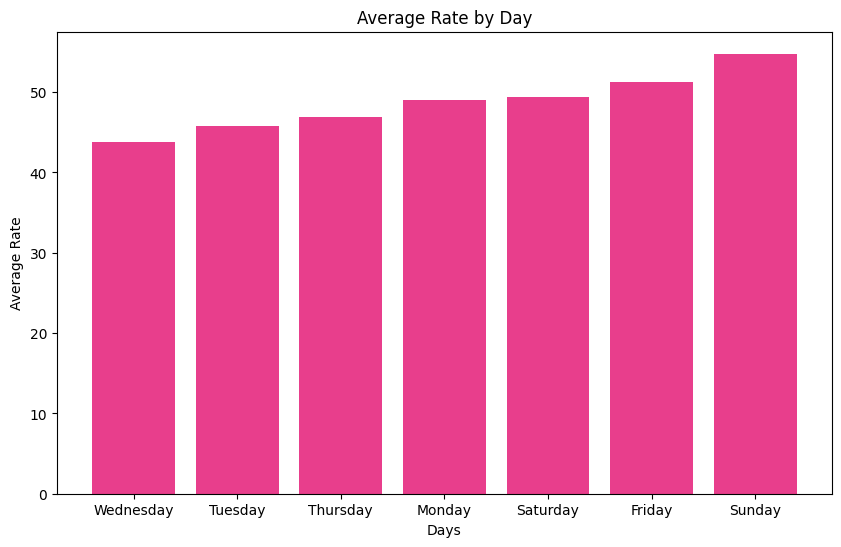

In [83]:
Enagement_per_day = wa.groupby('Day')['Rate'].mean().reset_index()
Enagement_per_day = Enagement_per_day.sort_values(by= 'Rate')
plt.figure(figsize=(10, 6))
plt.bar(Enagement_per_day['Day'], Enagement_per_day['Rate'], color=company_colors[2])
plt.title('Average Rate by Day')
plt.xlabel('Days')
plt.ylabel('Average Rate')
plt.show()


Weekend - Sunday, Saturday and Friday has the highest Rate.